# Load CSV files to MySQL using PYTHON

In [1]:
import mysql.connector
import pandas as pd
import os

In [2]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('order_items.csv', 'order_items'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('geolocation.csv','geolocation')
]

In [3]:
# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Abc@1234',
    database='ecommerce'
)
cursor = conn.cursor()

In [4]:
# Folder containing the CSV files
folder_path = 'C:\\Users\\DELL\\Desktop\\Ecommerce'

In [5]:
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value        

# connect PYTHON with MYSQL

In [16]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
db=mysql.connector.connect(
    host='localhost',
    username='root',
    password='Abc@1234',
    database='ecommerce'
)
cur=db.cursor()

# 1. List all unique cities where customers are located.

In [49]:
query="select distinct(customer_city) from customers"
cur.execute(query)
data=cur.fetchall()
# data is huge so we create dataframe of upper 10 cities just to understand
df=pd.DataFrame(data,columns=['city'])
df.head(10)

,city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


# 2. Count the number of orders placed in 2017.

In [23]:
query="""select count(order_id) from orders 
         where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
print(data)
print(data[0][0])
print("Total orders placed in 2017 are", data[0][0])


[(45101,)]
45101
Total orders placed in 2017 are 45101


# 3. Find the total sales per category.

In [32]:
query=""" select products.product_category, sum(order_items.freight_value + order_items.price)
          from products join order_items
          on products.product_id = order_items.product_id
          group by products.product_category
          """
cur.execute(query)
data=cur.fetchall()
data

[('HEALTH BEAUTY', 1441248.0709442254),
 ('sport leisure', 1156656.4791516159),
 ('Cool Stuff', 719329.9516363889),
 ('computer accessories', 1059272.397553496),
 ('Watches present', 1305541.6077855825),
 ('housewares', 778397.771007238),
 ('electronics', 206825.059628129),
 (None, 207705.08970690146),
 ('toys', 561372.5505669806),
 ('bed table bath', 1241681.7204459123),
 ('Games consoles', 177293.24053573608),
 ('automotive', 685384.320795551),
 ('Furniture Decoration', 902511.7925425861),
 ('home appliances', 94990.4302186966),
 ('telephony', 394883.31974659115),
 ('Construction Tools Construction', 165327.9998724237),
 ('perfumery', 453338.7086248398),
 ('stationary store', 277741.7099305503),
 ('Room Furniture', 86884.72989755869),
 ('Fashion Bags and Accessories', 184273.54054152966),
 ('Garden tools', 584219.2122244835),
 ('Fashion Underwear and Beach Fashion', 11457.740110397339),
 ('pet Shop', 253876.65004246682),
 ('SIGNALIZATION AND SAFETY', 28017.050145626068),
 ('ELECTRICE

In [34]:
query=""" select products.product_category, round(sum(order_items.freight_value + order_items.price),2)
          from products join order_items
          on products.product_id = order_items.product_id
          group by products.product_category
          """
cur.execute(query)
data=cur.fetchall()
# create dataframe of this data
df=pd.DataFrame(data,columns=['product category','sales'])
df


,product category,sales
0,HEALTH BEAUTY,1441248.07
1,sport leisure,1156656.48
2,Cool Stuff,719329.95
3,computer accessories,1059272.40
4,Watches present,1305541.61
...,...,...
69,flowers,1598.91
70,Kitchen portable and food coach,4278.29
71,House Comfort 2,1170.58
72,CITTE AND UPHACK FURNITURE,5998.54


# 4. Calculate the percentage of orders that were paid in installments.

In [40]:
query1=""" select count(payment_installments) from payments
          where payment_installments >=1 """
cur.execute(query)
data1=cur.fetchall()
data1


[(103884,)]

In [41]:
query2=" select count(payment_installments) from payments"
cur.execute(query2)
data2=cur.fetchall()
data2

[(103886,)]

In [44]:
"percentage of orders that were paid in installments is ",(103884/103886*100)

('percentage of orders that were paid in installments is ', 99.99807481277554)

# 5. Count the number of customers from each state. 

In [46]:
query="""select customer_state, count(distinct customer_id) from customers 
       group by customer_state"""
cur.execute(query)
data=cur.fetchall()
data

[('AC', 81),
 ('AL', 413),
 ('AM', 148),
 ('AP', 68),
 ('BA', 3380),
 ('CE', 1336),
 ('DF', 2140),
 ('ES', 2033),
 ('GO', 2020),
 ('MA', 747),
 ('MG', 11635),
 ('MS', 715),
 ('MT', 907),
 ('PA', 975),
 ('PB', 536),
 ('PE', 1652),
 ('PI', 495),
 ('PR', 5045),
 ('RJ', 12852),
 ('RN', 485),
 ('RO', 253),
 ('RR', 46),
 ('RS', 5466),
 ('SC', 3637),
 ('SE', 350),
 ('SP', 41746),
 ('TO', 280)]

# 6. Calculate the number of orders per month in 2018.

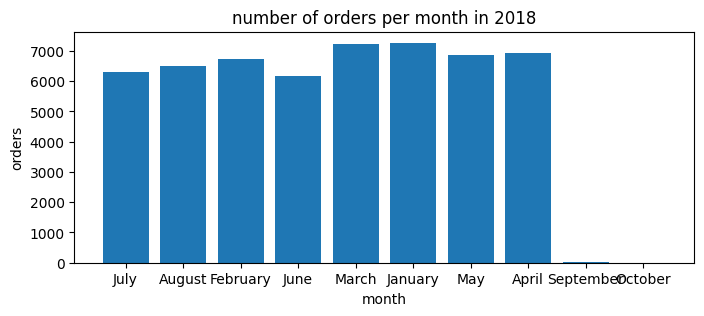

In [64]:
query="""select monthname(order_purchase_timestamp), count(order_id) from orders
         where year(order_purchase_timestamp)=2018
         group by monthname(order_purchase_timestamp) """
cur.execute(query)
data=cur.fetchall()

# create dataframe
df=pd.DataFrame(data,columns=['month','orders'])
df
plt.figure(figsize=(8,3))
plt.bar(df['month'],df['orders'],)
plt.title("number of orders per month in 2018")
plt.xlabel("month")
plt.ylabel("orders")
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [12]:
# Subquery
# create new table which we will use to find the result in next cell by using "with" function
query="""select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
         from orders join order_items
         on orders.order_id=order_items.order_id
         group by orders.order_id, orders.customer_id"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2
0,00125cb692d04887809806618a2a145f,8afb90a97ee661103014329b1bcea1a2,1
1,001c85b5f68d2be0cb0797afc9e8ce9a,48ed31e735f1c420ed6ca3637b7c744d,1
2,00471463a6106056c1a2a809f70de640,fcad74a7e0dff27c33e36cbd78280bf9,1
3,00571ded73b3c061925584feab0db425,3c628393675b42c6b5ef89461f68ecef,2
4,006dd93155bc2abd844cc5eed3a0fe7f,1b9506de3da8fd318853195b13fb2dda,1
...,...,...,...
98661,ff0d3c8b486f123087d9d9da102afaf6,bd33c2c896c5ff73c205660af316b420,1
98662,ff23c2ed75e1dd692c237538513b27a6,4bf8f2a0187cada294f054af193475e7,1
98663,ffabb8ed44ae4f83efd9d206904d88f5,96789cb4ceff0012efe52f4faf4a2d2e,2
98664,ffb18bf111fa70edf316eb0390427986,5c8f393ae866c2a2d2e775dbc2409a59,3


In [13]:
query="""with count_per_order as 
         (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
         from orders join order_items
         on orders.order_id=order_items.order_id
         group by orders.order_id, orders.customer_id)
         select customers.customer_city, avg(count_per_order.oc)
         from customers join count_per_order
         on customers.customer_id=count_per_order.customer_id
         group by customers.customer_city
         """
cur.execute(query)
data=cur.fetchall()
# create dataframe
df=pd.DataFrame(data,columns=['city','avg products per order'])
df

,city,avg products per order
0,sao paulo,1.1562
1,sao jose dos campos,1.1385
2,porto alegre,1.1749
3,indaial,1.1154
4,treze tilias,1.2727
...,...,...
4105,japaratuba,1.0000
4106,sebastiao leal,1.0000
4107,buriti,3.0000
4108,morro agudo de goias,1.0000


Here , first of all we created a table - count_per_order using "with"..
then we joined customer table with newly created count_per_order table

# 8. Calculate the percentage of total revenue contributed by each product category.

In [67]:
query="select sum(order_items.freight_value + order_items.price) from order_items"
cur.execute(query)
data=cur.fetchall()
"Total revenue is",data

('Total revenue is', [(15843553.244720478,)])

In [71]:
query=""" select products.product_category, sum(order_items.freight_value + order_items.price)/15843553.244720478*100 as percent
          from products join order_items
          on products.product_id = order_items.product_id
          group by products.product_category
          order by percent desc
          """
cur.execute(query)
data=cur.fetchall()
# create dataframe of top 10 categories having high percentage of revenue
df=pd.DataFrame(data,columns=['category','% of total revenue'])
df.head(10)

,category,% of total revenue
0,HEALTH BEAUTY,9.096748
1,Watches present,8.240207
2,bed table bath,7.837142
3,sport leisure,7.300487
4,computer accessories,6.685826
5,Furniture Decoration,5.696398
6,housewares,4.913025
7,Cool Stuff,4.540206
8,automotive,4.325951
9,Garden tools,3.687425


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [74]:
query="""select products.product_category, count(order_items.product_id), round(avg(order_items.price),2)
         from products join order_items 
         on products.product_id=order_items.product_id
         group by products.product_category """
cur.execute(query)
data=cur.fetchall()
# create dataframe 
df=pd.DataFrame(data,columns=['category','product purchase time','avg price'])
df
# correlation using numpy
arr1=df['product purchase time']
arr2=df['avg price']
np.corrcoef(arr1,arr2)


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

Here, -0.10631514 shows correlation which means value is close to zero (means no such impact on each other)

# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [80]:
query="""select * , dense_rank() over(order by revenue desc) as rn from
         (select seller_id, sum(price+freight_value) as revenue
         from order_items
         group by seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
# create dataframe 
df=pd.DataFrame(data,columns=['seller id','revenue','rank'])
df

,seller id,revenue,rank
0,4869f7a5dfa277a7dca6462dcf3b52b2,249640.698354,1
1,7c67e1448b00f6e969d365cea6b010ab,239536.441972,2
2,53243585a1d6dc2643021fd1853d8905,235856.679551,3
3,4a3ca9315b744ce9f8e9374361493884,235539.961510,4
4,fa1c13f2614d7b5c4749cbc52fecda94,204084.729413,5
...,...,...,...
3090,702835e4b785b67a084280efca355756,18.560000,3083
3091,4965a7002cca77301c82d3f91b82e1a9,16.360000,3084
3092,1fa2d3def6adfa70e58c276bb64fe5bb,15.900000,3085
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3086


# 11. Calculate the moving average of order values for each customer over their order history.

In [4]:
# Subquery
query=""" select orders.customer_id, orders.order_purchase_timestamp , payments.payment_value
          from payments join orders 
          on orders.order_id=payments.order_id"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df


,0,1,2
0,cefab390926b6fc3de3ca94c82ebb1ba,2017-09-25 16:38:46,26.58
1,7e2ca73af071679902a9ba14d7c3cee8,2018-06-11 14:59:24,340.08
2,4a00f00d951c167739888a1f16c56e8e,2018-01-14 18:49:14,48.91
3,625784c6aad212dc7d249ea10e276617,2017-07-18 13:32:25,154.14
4,0080e98d82eceee143dc006defe00687,2017-10-26 18:29:04,72.66
...,...,...,...
103881,632615afeadba799faf8226958a2eaa3,2018-08-10 09:09:10,192.32
103882,0ceb28a00e14081b054eee1421d9d970,2018-03-02 13:20:21,97.08
103883,c54441883076342cdd91c5f17ea64ee5,2017-06-20 13:13:30,71.63
103884,a20effc0e40fbad0f1f863c4fa049437,2017-09-04 11:49:09,75.07


In [7]:
query="""select customer_id, order_purchase_timestamp,payment, 
         avg(payment) over(partition by customer_id order by order_purchase_timestamp
         rows between 2 preceding and current row ) as moving_avg
         from
         (select orders.customer_id, orders.order_purchase_timestamp , payments.payment_value as payment
          from payments join orders 
          on orders.order_id=payments.order_id) as a """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df         

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 12. Calculate the cumulative sales per month for each year.

In [8]:
# Subquery
query="""select year(orders.order_purchase_timestamp) as years,
         month(orders.order_purchase_timestamp) as months,
         sum(payments.payment_value) as payments
         from orders join payments
         on orders.order_id=payments.order_id
         group by years, months
         order by years, months"""
cur.execute(query)
data=cur.fetchall()
data

[(2016, 9, 252.23999404907227),
 (2016, 10, 59090.47999930382),
 (2016, 12, 19.6200008392334),
 (2017, 1, 138488.04006415606),
 (2017, 2, 291908.00950714946),
 (2017, 3, 449863.5995282233),
 (2017, 4, 417788.02949872613),
 (2017, 5, 592918.8201363329),
 (2017, 6, 511276.38032871485),
 (2017, 7, 592382.9194870591),
 (2017, 8, 674396.319929732),
 (2017, 9, 727762.4504067749),
 (2017, 10, 779677.8797355182),
 (2017, 11, 1194882.7997162547),
 (2017, 12, 878401.4798712283),
 (2018, 1, 1115004.179163769),
 (2018, 2, 992463.3401646316),
 (2018, 3, 1159652.1196559817),
 (2018, 4, 1160785.480685437),
 (2018, 5, 1153982.1510876399),
 (2018, 6, 1023880.50073741),
 (2018, 7, 1066540.7488443647),
 (2018, 8, 1022425.321382761),
 (2018, 9, 4439.540130615234),
 (2018, 10, 589.6699981689453)]

In [9]:
query="""select years, months, payment, sum(payment)
         over(order by years,months) cumulative_sales 
         from
         (select year(orders.order_purchase_timestamp) as years,
         month(orders.order_purchase_timestamp) as months,
         sum(payments.payment_value) as payment
         from orders join payments
         on orders.order_id=payments.order_id
         group by years, months
         order by years, months) as a"""
cur.execute(query)
data=cur.fetchall()
data

[(2016, 9, 252.23999404907227, 252.23999404907227),
 (2016, 10, 59090.47999930382, 59342.71999335289),
 (2016, 12, 19.6200008392334, 59362.33999419212),
 (2017, 1, 138488.04006415606, 197850.38005834818),
 (2017, 2, 291908.00950714946, 489758.38956549764),
 (2017, 3, 449863.5995282233, 939621.9890937209),
 (2017, 4, 417788.02949872613, 1357410.018592447),
 (2017, 5, 592918.8201363329, 1950328.83872878),
 (2017, 6, 511276.38032871485, 2461605.219057495),
 (2017, 7, 592382.9194870591, 3053988.138544554),
 (2017, 8, 674396.319929732, 3728384.458474286),
 (2017, 9, 727762.4504067749, 4456146.908881061),
 (2017, 10, 779677.8797355182, 5235824.788616579),
 (2017, 11, 1194882.7997162547, 6430707.588332834),
 (2017, 12, 878401.4798712283, 7309109.068204062),
 (2018, 1, 1115004.179163769, 8424113.247367831),
 (2018, 2, 992463.3401646316, 9416576.587532463),
 (2018, 3, 1159652.1196559817, 10576228.707188444),
 (2018, 4, 1160785.480685437, 11737014.187873881),
 (2018, 5, 1153982.1510876399, 12890

# 13. Calculate the year-over-year growth rate of total sales.

In [20]:
# Subquery
# create table 
query="""select year(orders.order_purchase_timestamp) as years,
         round(sum(payments.payment_value),2) as payment
         from orders join payments
         on orders.order_id=payments.order_id
         group by years
         order by years
         """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','sale'])
df

,years,sale
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05


In [23]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,
         round(sum(payments.payment_value),2) as payment
         from orders join payments
         on orders.order_id=payments.order_id
         group by years
         order by years)
         
         select years, ((payment-lag(payment,1) over(order by years))/
         lag(payment,1) over(order by years)) * 100 from a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','yoy'])
df

,years,yoy
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 14. Identify the top 3 customers who spent the most money in each year.

In [31]:
# Subquery
query="""select year(orders.order_purchase_timestamp),
         orders.customer_id, 
         sum(payments.payment_value) as payment,
         dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as drank
         from orders join payments 
         on orders.order_id=payments.order_id
         group by  year(orders.order_purchase_timestamp) , orders.customer_id"""
cur.execute(query)
data=cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2016, '1fc56719b52f82c03caddc5faf531fbb', 982.4099731445312, 4),
 (2016, '85f0e92957e9fb9c5f72ba5378f492a0', 979.9099731445312, 5),
 (2016, 'd96619b47e477e6bcc377bb89f2ddaee', 971.9600219726562, 6),
 (2016, 'e937151346d1bec664f5b80cd798bdd2', 818.1199951171875, 7),
 (2016, '303f96887b473d72e34c2d0e492fa43b', 784.7999877929688, 8),
 (2016, '14a2912b7f370c345cebcda474774f55', 783.219970703125, 9),
 (2016, '6b79d5d9914b88e0e05a19e76dfe926b', 676.9199829101562, 10),
 (2016, '88dc22aad9cf20898eb3780977173dc5', 674.3300170898438, 11),
 (2016, 'b03bfe9da81252f5e3b39196ba3518c0', 671.3099975585938, 12),
 (2016, '46fc16f07712c5cdcdd55911a3297e16', 663.9299926757812, 13),
 (2016, '053716fea805d6b29d6f8b6113fefe4d', 661.75, 14),
 (2016, '442d66f0d96f656096dd70f1b0391e40', 659.4099731445312, 15),
 

In [35]:
# Top 3
query="""select years, customer_id, payment, drank
         from
         (select year(orders.order_purchase_timestamp) as years,
         orders.customer_id, 
         sum(payments.payment_value) as payment,
         dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as drank
         from orders join payments 
         on orders.order_id=payments.order_id
         group by  year(orders.order_purchase_timestamp) , orders.customer_id) as a
         where drank <=3 """
cur.execute(query)
data=cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]